<a href="https://colab.research.google.com/github/shikharmay7/DiabeticRetinopathy/blob/master/DRGradingv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train_df = pd.read_csv('/content/drive/My Drive/Datasets/regular-fundus-training/regular-fundus-training.csv')
val_df = pd.read_csv('/content/drive/My Drive/Datasets/regular-fundus-validation/regular-fundus-validation.csv')

In [6]:
print("training data: " , train_df.shape)
print("validation" , val_df.shape)

training data:  (1200, 10)
validation (400, 10)


In [0]:
image_id = train_df['image_id']
patient_id = train_df['patient_id']
image_path = train_df['image_path']
left_dr = train_df['left_eye_DR_Level']
right_dr = train_df['right_eye_DR_Level']

In [0]:
train=[]
train_y=[]
for i in range(train_df.shape[0]):
  imgPath = "/content/drive/My Drive/Datasets/regular-fundus-training/"+str(patient_id[i])+"/" + str(image_id[i])+".jpg"
  train.append(imgPath)
  if(i%4==0 or i%4==1):
    train_y.append(left_dr[i])
  else:
    train_y.append(right_dr[i])

In [10]:
print(train_y[:10])

[0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0]


In [0]:
vimage_id = val_df['image_id']
vpatient_id = val_df['patient_id']
vimage_path = val_df['image_path']
vleft_dr = val_df['left_eye_DR_Level']
vright_dr = val_df['right_eye_DR_Level']

In [0]:
val=[]
val_y=[]
for i in range(val_df.shape[0]):
  imgPath = "/content/drive/My Drive/Datasets/regular-fundus-validation/"+str(vpatient_id[i])+"/" + str(vimage_id[i])+".jpg"
  val.append(imgPath)
  if(i%4==0 or i%4==1):
    val_y.append(vleft_dr[i])
  else:
    val_y.append(vright_dr[i])

In [13]:
print(val[:10])
print(val_y[:10])

['/content/drive/My Drive/Datasets/regular-fundus-validation/265/265_l1.jpg', '/content/drive/My Drive/Datasets/regular-fundus-validation/265/265_l2.jpg', '/content/drive/My Drive/Datasets/regular-fundus-validation/265/265_r1.jpg', '/content/drive/My Drive/Datasets/regular-fundus-validation/265/265_r2.jpg', '/content/drive/My Drive/Datasets/regular-fundus-validation/267/267_l1.jpg', '/content/drive/My Drive/Datasets/regular-fundus-validation/267/267_l2.jpg', '/content/drive/My Drive/Datasets/regular-fundus-validation/267/267_r1.jpg', '/content/drive/My Drive/Datasets/regular-fundus-validation/267/267_r2.jpg', '/content/drive/My Drive/Datasets/regular-fundus-validation/277/277_l1.jpg', '/content/drive/My Drive/Datasets/regular-fundus-validation/277/277_l2.jpg']
[3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 2.0, 2.0]


In [14]:
# Importing Keras libraries
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import VGG16, ResNet50
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

Using TensorFlow backend.


In [0]:
nb_class=5
y_train = np_utils.to_categorical(train_y, nb_class)
y_val = np_utils.to_categorical(val_y, nb_class)

In [16]:
y_train[:10]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

Training data available in 5 classes
[540, 140, 234, 214, 72]


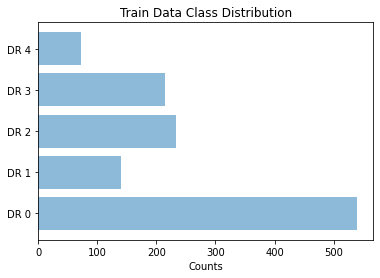

In [17]:
print("Training data available in 5 classes")
print([train_y.count(i) for i in range(5)])
 
DR_classes = ('DR 0','DR 1','DR 2', 'DR 3', 'DR 4')
 
y_pos = np.arange(len(DR_classes))
counts = [train_y.count(i) for i in range(5)]
 
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, DR_classes)
plt.xlabel('Counts')
plt.title('Train Data Class Distribution')
plt.show()

In [0]:
def show_imgs(X):
    plt.figure(figsize=(8, 8))
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            image = load_img(train[k], target_size=(224, 224))
            plt.subplot2grid((4,4),(i,j))
            plt.imshow(image)
            k = k+1
    # show the plot
    plt.show()

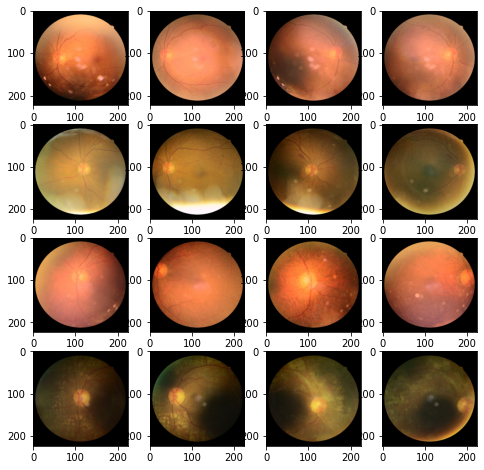

In [19]:
show_imgs(train)

In [24]:
a = [[1, 2],
     [3, 4]]
a

[[1, 2], [3, 4]]

In [25]:
b = [[5, 6],
     [7, 8]]
b

[[5, 6], [7, 8]]

In [0]:
c = np.concatenate((a,b), axis=1)

In [28]:
c

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [29]:
model1 = VGG16(weights='imagenet', include_top = False)
model1.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [30]:
model2 = ResNet50(weights='imagenet', include_top = False);
model2.summary()

  212992/94653016 [..............................] - ETA: 23s

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________

In [0]:
def create_features(dataset, pre_model):
 
    x_scratch = []
 
    # loop over the images
    for imagePath in dataset:
 
        # load the input image and image is resized to 224x224 pixels 
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
 
        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
 
        # add the image to the batch
        x_scratch.append(image)
 
    x = np.vstack(x_scratch)
    features = pre_model.predict(x, batch_size=32)
    features_flatten = features.reshape((features.shape[0], 7 * 7 * 512))
    return x, features, features_flatten

In [33]:
train_x1, train_features1, train_features_flatten1 = create_features(train, model1)
val_x1, val_features1, val_features_flatten1 = create_features(val, model1)

print(train_x1.shape, train_features1.shape, train_features_flatten1.shape)
print(val_x1.shape, val_features1.shape, val_features_flatten1.shape)

(1200, 224, 224, 3) (1200, 7, 7, 512) (1200, 25088)
(400, 224, 224, 3) (400, 7, 7, 512) (400, 25088)


In [0]:
def create_features2(dataset, pre_model):
 
    x_scratch = []
 
    # loop over the images
    for imagePath in dataset:
 
        # load the input image and image is resized to 224x224 pixels 
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
 
        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
 
        # add the image to the batch
        x_scratch.append(image)
 
    x = np.vstack(x_scratch)
    features = pre_model.predict(x, batch_size=32)
    features_flatten = features.reshape((features.shape[0], 7 * 7 * 2048))
    return x, features, features_flatten

In [36]:
train_x2, train_features2, train_features_flatten2 = create_features2(train, model2)
val_x2, val_features2, val_features_flatten2 = create_features2(val, model2)

print(train_x2.shape, train_features2.shape, train_features_flatten2.shape)
print(val_x2.shape, val_features2.shape, val_features_flatten2.shape)

(1200, 224, 224, 3) (1200, 7, 7, 2048) (1200, 100352)
(400, 224, 224, 3) (400, 7, 7, 2048) (400, 100352)


In [0]:
#train_x = np.concatenate((train_x1,train_x2), axis=1)
#train_features = np.concatenate((train_features1,train_features2), axis=1)
train_features_flatten = np.concatenate((train_features_flatten1,train_features_flatten2), axis=1)

#val_x = np.concatenate((val_x1,val_x2), axis=1)
#val_features = np.concatenate((val_features1,val_features2), axis=1)
val_features_flatten = np.concatenate((val_features_flatten1,val_features_flatten2), axis=1)

In [0]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]   
}

In [52]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(train_features_flatten,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [0]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [54]:
display(cv)

Best parameters are: {'max_depth': None, 'n_estimators': 100}


0.478 + or -0.018 for the {'max_depth': 2, 'n_estimators': 5}
0.477 + or -0.013 for the {'max_depth': 2, 'n_estimators': 10}
0.479 + or -0.015 for the {'max_depth': 2, 'n_estimators': 50}
0.484 + or -0.016 for the {'max_depth': 2, 'n_estimators': 100}
0.477 + or -0.014 for the {'max_depth': 2, 'n_estimators': 250}
0.517 + or -0.02 for the {'max_depth': 4, 'n_estimators': 5}
0.52 + or -0.031 for the {'max_depth': 4, 'n_estimators': 10}
0.542 + or -0.035 for the {'max_depth': 4, 'n_estimators': 50}
0.518 + or -0.041 for the {'max_depth': 4, 'n_estimators': 100}
0.531 + or -0.036 for the {'max_depth': 4, 'n_estimators': 250}
0.49 + or -0.027 for the {'max_depth': 8, 'n_estimators': 5}
0.519 + or -0.022 for the {'max_depth': 8, 'n_estimators': 10}
0.54 + or -0.027 for the {'max_depth': 8, 'n_estimators': 50}
0.558 + or -0.032 for the {'max_depth': 8, 'n_estimators': 100}
0.543 + or -0.033 for the {'max_depth': 8, 'n_estimators

In [55]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None)
rf.fit(train_features_flatten, train_y)


y_pred_train = rf.predict(train_features_flatten)
# predictions for test
y_pred_val = rf.predict(val_features_flatten)
    # training metrics
print("Training metrics:")
print(sklearn.metrics.classification_report(y_true= train_y, y_pred= y_pred_train))
    
    # test data metrics
print("Test data metrics:")
print(sklearn.metrics.classification_report(y_true= val_y, y_pred= y_pred_val))

Training metrics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       540
         1.0       1.00      1.00      1.00       140
         2.0       1.00      1.00      1.00       234
         3.0       1.00      1.00      1.00       214
         4.0       1.00      1.00      1.00        72

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200

Test data metrics:
              precision    recall  f1-score   support

         0.0       0.62      0.87      0.72       174
         1.0       0.12      0.02      0.04        46
         2.0       0.46      0.42      0.44        92
         3.0       0.61      0.56      0.58        68
         4.0       0.00      0.00      0.00        20

    accuracy                           0.57       400
   macro avg       0.36      0.37      0.36       400
weighted avg       0.49      0.57      0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
#Creating Quadratic Weighted Kappa Metric
from sklearn.metrics import confusion_matrix

actual_val = val_y
pred_val = y_pred_val

type(pred_val)
pred_val_list=[]
for i in range(pred_val.shape[0]):
  pred_val_list.append(pred_val[i])

O = confusion_matrix(actual_val, pred_val)
# pred_val.shape[0]
O

array([[151,   5,  16,   2,   0],
       [ 34,   1,  10,   1,   0],
       [ 41,   2,  39,  10,   0],
       [ 13,   0,  17,  38,   0],
       [  6,   0,   3,  11,   0]])

In [57]:
#Step 2: Weighted Matrix
W = np.zeros((5,5))
for i in range(len(W)):
  for j in range(len(W)):
    W[i][j] = float(((i-j)**2)/16)
W

array([[0.    , 0.0625, 0.25  , 0.5625, 1.    ],
       [0.0625, 0.    , 0.0625, 0.25  , 0.5625],
       [0.25  , 0.0625, 0.    , 0.0625, 0.25  ],
       [0.5625, 0.25  , 0.0625, 0.    , 0.0625],
       [1.    , 0.5625, 0.25  , 0.0625, 0.    ]])

In [58]:
#Step 3: Histogram
n=5
# act_val_hist = np.zeros([n])
# pred_val_hist = np.zeros([n])

# for item in actual_val:
#   act_val_hist[item]+=1
# for item in pred_val:
#   pred_val_hist[item]+=1
act_val_hist = [actual_val.count(i) for i in range(n)]
pred_val_hist = [pred_val_list.count(i) for i in range(n)]

print(f'Actual validation freq: {act_val_hist} Predicted Validation freq: {pred_val_hist}' )

Actual validation freq: [174, 46, 92, 68, 20] Predicted Validation freq: [245, 8, 85, 62, 0]


In [59]:
#Step 4: Expected Value (Outer Product of histogram)
E = np.outer(act_val_hist, pred_val_hist)
E

array([[42630,  1392, 14790, 10788,     0],
       [11270,   368,  3910,  2852,     0],
       [22540,   736,  7820,  5704,     0],
       [16660,   544,  5780,  4216,     0],
       [ 4900,   160,  1700,  1240,     0]])

In [0]:
#Step 5: Normalize E and O matrix
E = E/E.sum()
O = O/O.sum()
# E.sum()

In [0]:
#Step 6: Weighted Kappa Calculation
def weighted_kappa(W,O,E,n):
  num=0
  den=0
  for i in range(n):
    for j in range(n):
      num+=W[i][j]*O[i][j]
      den+=W[i][j]*E[i][j]
  
  kappa = (1-(num/den))
  return kappa

In [62]:
weighted_kappa(W,O,E,n)

0.5715978488743048